# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%matplotlib inline


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howard springs
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | santa ana
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | kralendijk
Processing Record 11 of Set 1 | howrah
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | karratha
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | fort valley
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | manicore
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | kodok
City not found. Skipping...
Processing

In [6]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howard springs,-12.4970,131.0470,306.10,36,80,4.32,AU,1723090508
1,yellowknife,62.4560,-114.3525,289.41,48,1,3.92,CA,1723090402
2,east london,-33.0153,27.9116,283.67,66,0,3.60,ZA,1723090510
3,blackmans bay,-43.0167,147.3167,286.89,61,100,1.79,AU,1723090511
4,hermanus,-34.4187,19.2345,284.44,86,0,3.14,ZA,1723090512


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.4970,131.0470,306.10,36,80,4.32,AU,1723090508
1,yellowknife,62.4560,-114.3525,289.41,48,1,3.92,CA,1723090402
2,east london,-33.0153,27.9116,283.67,66,0,3.60,ZA,1723090510
3,blackmans bay,-43.0167,147.3167,286.89,61,100,1.79,AU,1723090511
4,hermanus,-34.4187,19.2345,284.44,86,0,3.14,ZA,1723090512


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

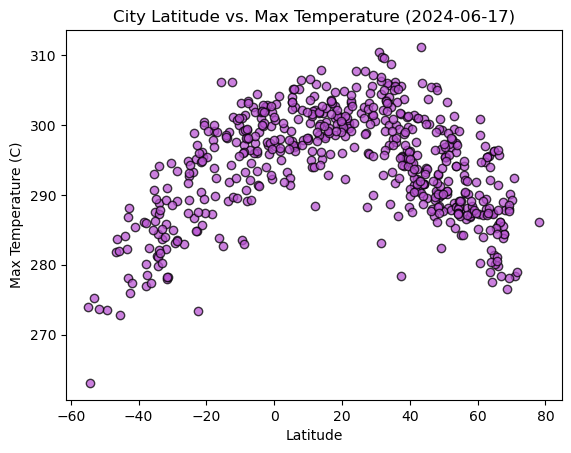

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='mediumorchid',edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

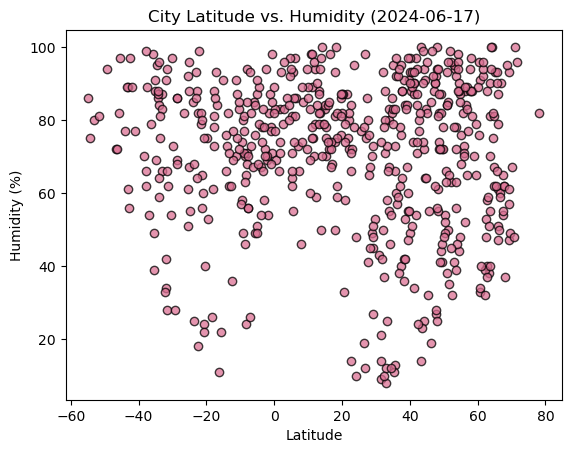

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],color='palevioletred',edgecolors='k', alpha=0.75)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

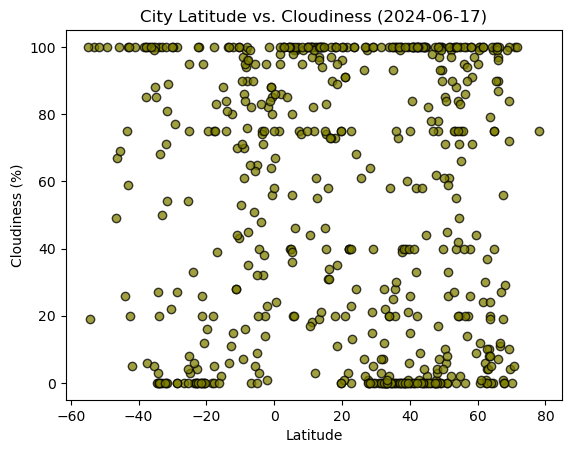

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='olive',edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

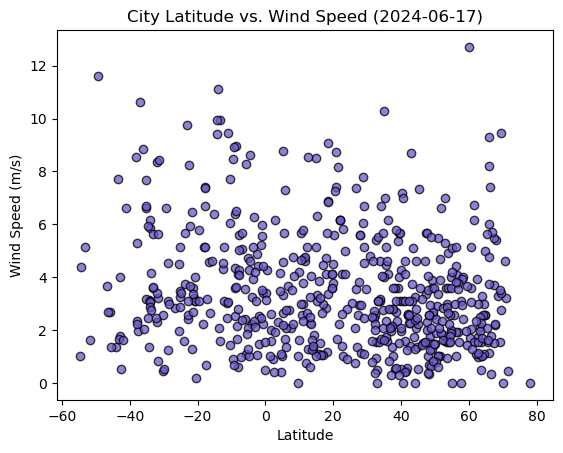

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='slateblue',edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot_pls(x_values, y_values, xlabel, ylabel, title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    # Create the plot
    plt.scatter(x_values, y_values, c='goldenrod', edgecolors='k', alpha=0.75)
    plt.plot(x_values, regress_values, 'r-')
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Show plot
    plt.show()


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,289.41,48,1,3.92,CA,1723090402
5,santa ana,33.7456,-117.8678,297.21,83,20,3.09,US,1723090513
6,bethel,41.3712,-73.4140,291.49,90,100,0.45,US,1723090510
8,kapuskasing,49.4169,-82.4331,290.20,72,100,2.57,CA,1723090516
9,kralendijk,12.1500,-68.2667,302.14,79,3,5.14,BQ,1723090517


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.4970,131.0470,306.10,36,80,4.32,AU,1723090508
2,east london,-33.0153,27.9116,283.67,66,0,3.60,ZA,1723090510
3,blackmans bay,-43.0167,147.3167,286.89,61,100,1.79,AU,1723090511
4,hermanus,-34.4187,19.2345,284.44,86,0,3.14,ZA,1723090512
7,afaahiti,-17.7500,-149.2833,299.08,81,5,7.40,PF,1723090515


###  Temperature vs. Latitude Linear Regression Plot

TypeError: annotate() missing 1 required positional argument: 'xy'

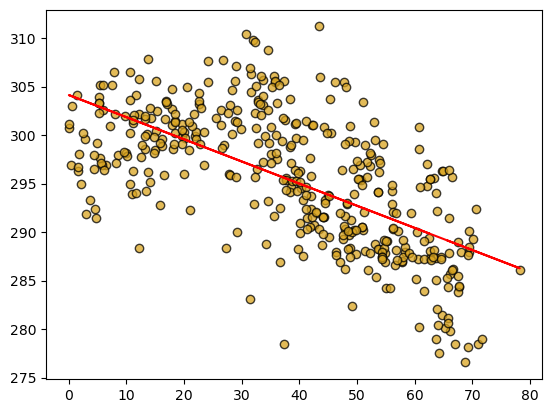

In [41]:
# Linear regression on Northern Hemisphere

create_linear_regression_plot_pls(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],"Latitude","Max Temp","Latitude vs Max Temp")


The r^2-value is: 0.6720220238897325


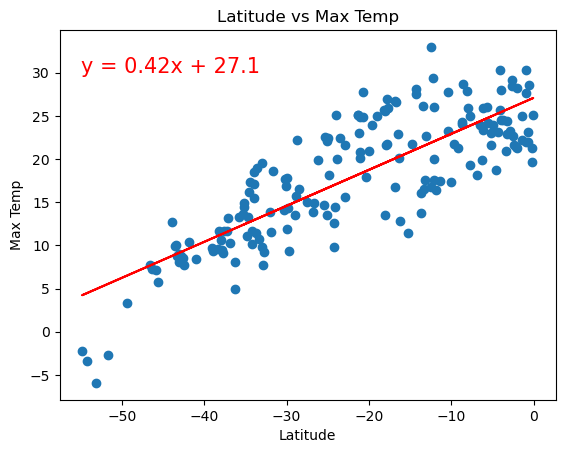

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


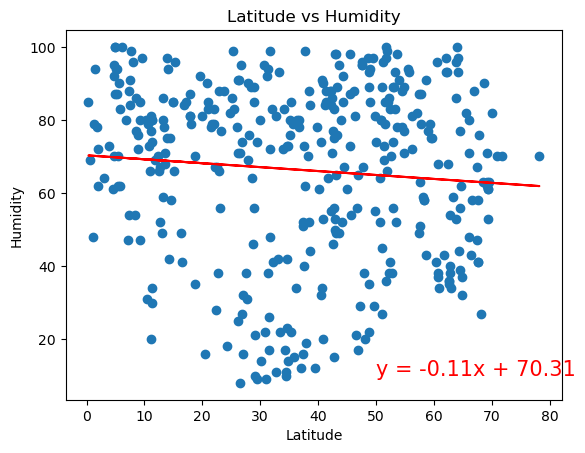

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


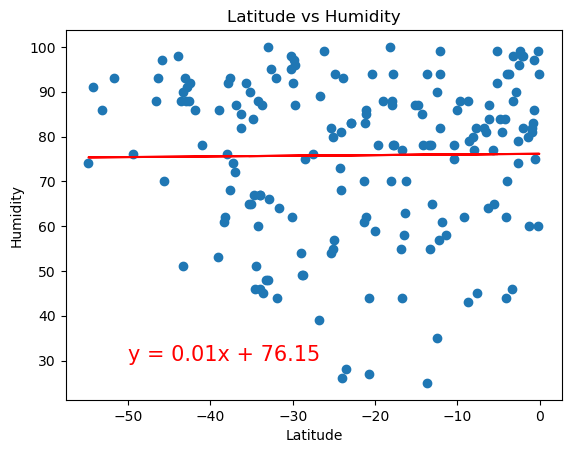

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


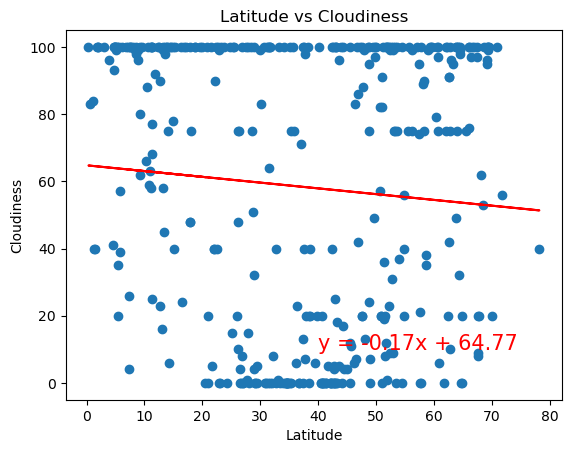

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


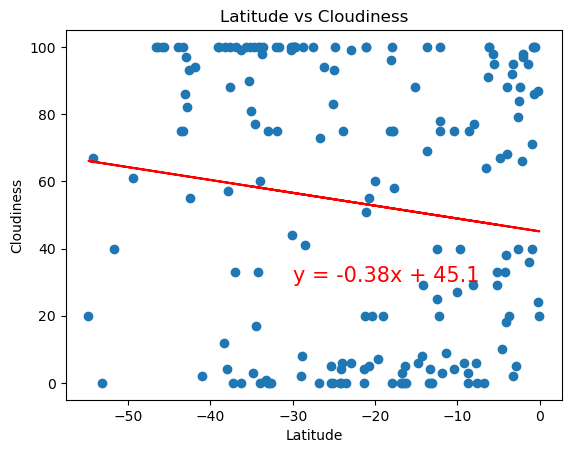

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


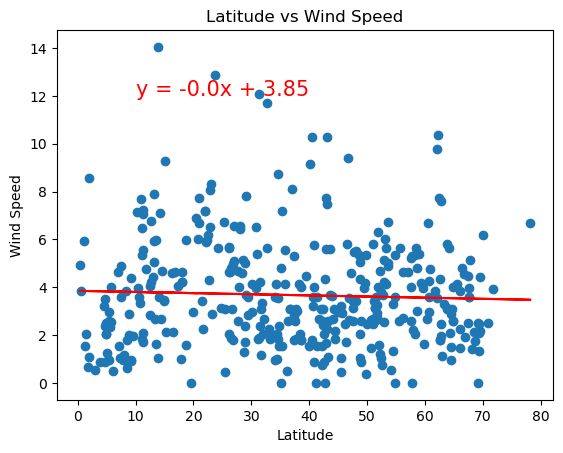

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


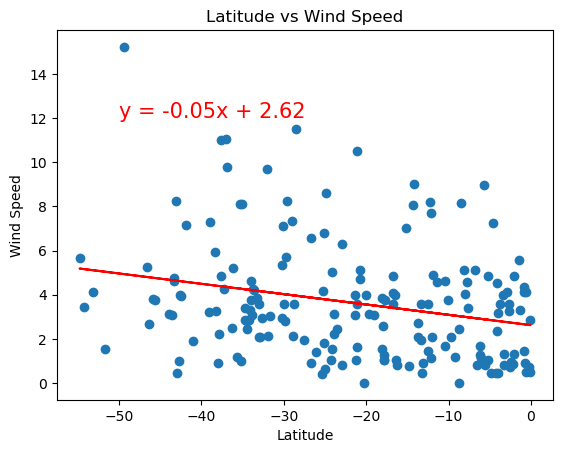

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE